## Packages and Assets

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import json
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
test = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')

In [3]:
with open('../../assets/traditional_assets/count_vectorizer_vocab.json', 'r') as f:
    count_vectorizer_vocab = json.load(f)
    count_vectorizer_vocab = dict(count_vectorizer_vocab)

In [4]:
model = pickle.load(open("../../assets/traditional_assets/naive_bayes_model.sav", 'rb'))

## Functions

In [5]:
def viewPredictedRows(X_test, y_test, y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df['correct'] = df['y_test'] == df['y_pred']
    df['correct'] = df['correct'].apply(lambda x: 'Correct' if x else 'Incorrect')
    df['title'] = X_test
    return df


In [6]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

## Predictions

In [7]:
cv = CountVectorizer(ngram_range=(1, 1), vocabulary=count_vectorizer_vocab)
X_test = cv.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())


# cv = CountVectorizer(ngram_range=(1, 1))
# X_test = cv.fit_transform(test['title']).toarray()
# # X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())
# X_test_names

In [8]:
y_test = test['label']

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       581
           1       0.89      0.86      0.87       628
           2       0.83      0.88      0.85       376
           3       0.66      0.76      0.71       217

    accuracy                           0.84      1802
   macro avg       0.81      0.83      0.82      1802
weighted avg       0.84      0.84      0.84      1802

Confusion Matrix


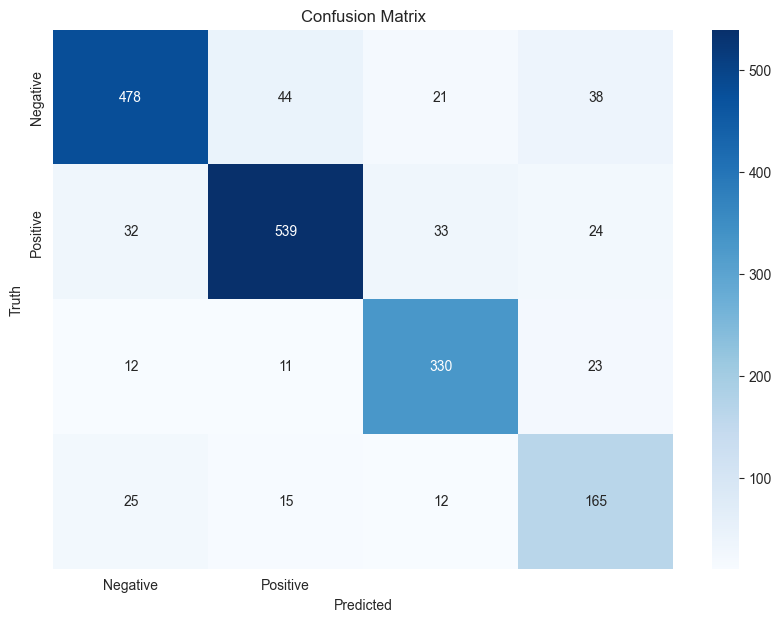

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [10]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results


,y_test,y_pred,correct,title
0,2,2,Correct,acao vale despenca relatorio cpi veja document...
1,1,1,Correct,petrobras ve tendencia estabilizacao casos cov...
2,3,3,Correct,itau define valores datas pagamentos proventos...
3,1,1,Correct,petrobras petr4 mudancas conselho gestao podem...
4,0,0,Correct,dolar queda guerra comercial cheque especial b...
...,...,...,...,...
1797,1,1,Correct,francesa total vende fatia blocos foz amazonas...
1798,1,1,Correct,mais plataforma comeca produzir premenos sal b...
1799,3,1,Incorrect,ibovespa leve alta comeco mes normalmente volatil
1800,1,2,Incorrect,os gringos vem vem bolsa
